In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline

# Weather data

In [2]:
weather = pd.read_csv('data/environment/ninja_weather_55.6838_12.5354_uncorrected.csv',header=3)

In [3]:
weather.index = weather.time

In [14]:
weather

,time,local_time,temperature,radiation_surface
time,,,,
2014-01-01 00:00,2014-01-01 00:00,2014-01-01 01:00,2.118,0.0
2014-01-01 01:00,2014-01-01 01:00,2014-01-01 02:00,2.147,0.0
2014-01-01 02:00,2014-01-01 02:00,2014-01-01 03:00,2.324,0.0
2014-01-01 03:00,2014-01-01 03:00,2014-01-01 04:00,2.344,0.0
2014-01-01 04:00,2014-01-01 04:00,2014-01-01 05:00,2.384,0.0
...,...,...,...,...
2014-12-31 19:00,2014-12-31 19:00,2014-12-31 20:00,3.075,0.0
2014-12-31 20:00,2014-12-31 20:00,2014-12-31 21:00,3.164,0.0
2014-12-31 21:00,2014-12-31 21:00,2014-12-31 22:00,3.210,0.0


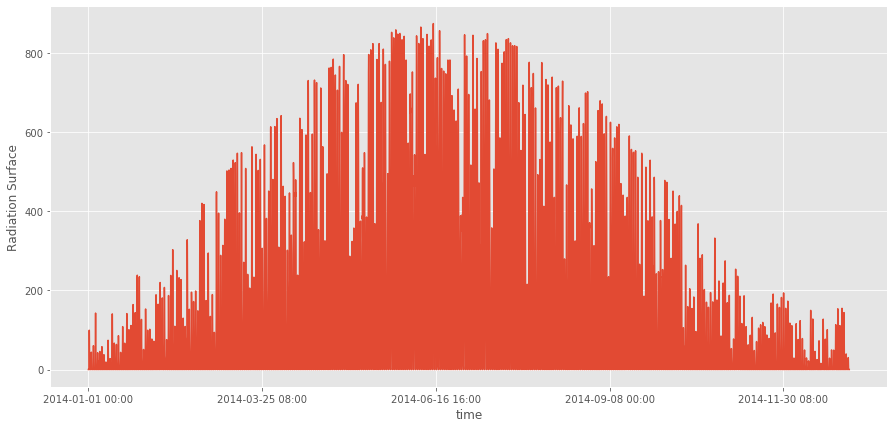

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Radiation Surface')
plt.xlabel('Date')
weather.loc[:,'radiation_surface'].plot(ax=ax)

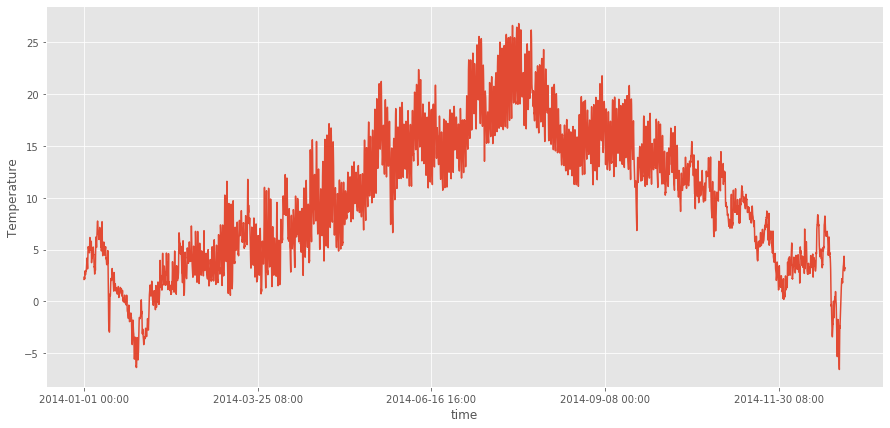

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
weather.loc[:,'temperature'].plot(ax=ax)

In [26]:
weather.describe()

,temperature,radiation_surface
count,8760.000000,8760.000000
mean,9.996626,133.634475
std,6.662291,211.872905
min,-6.557000,0.000000
25%,4.353250,0.000000
50%,10.026500,4.391500
75%,15.174500,190.447000
max,26.763000,875.069000


In [4]:
start = pd.to_datetime('2014-11-07', infer_datetime_format=True)
end = pd.to_datetime('2014-11-15', infer_datetime_format=True)
time = pd.to_datetime(weather['time'], infer_datetime_format=True)
weather['time']=time

In [5]:
dates = pd.date_range(start = start, end = end, freq='D')

In [6]:
dates

DatetimeIndex(['2014-11-07', '2014-11-08', '2014-11-09', '2014-11-10',
               '2014-11-11', '2014-11-12', '2014-11-13', '2014-11-14',
               '2014-11-15'],
              dtype='datetime64[ns]', freq='D')

In [6]:
weather.index = weather['time']

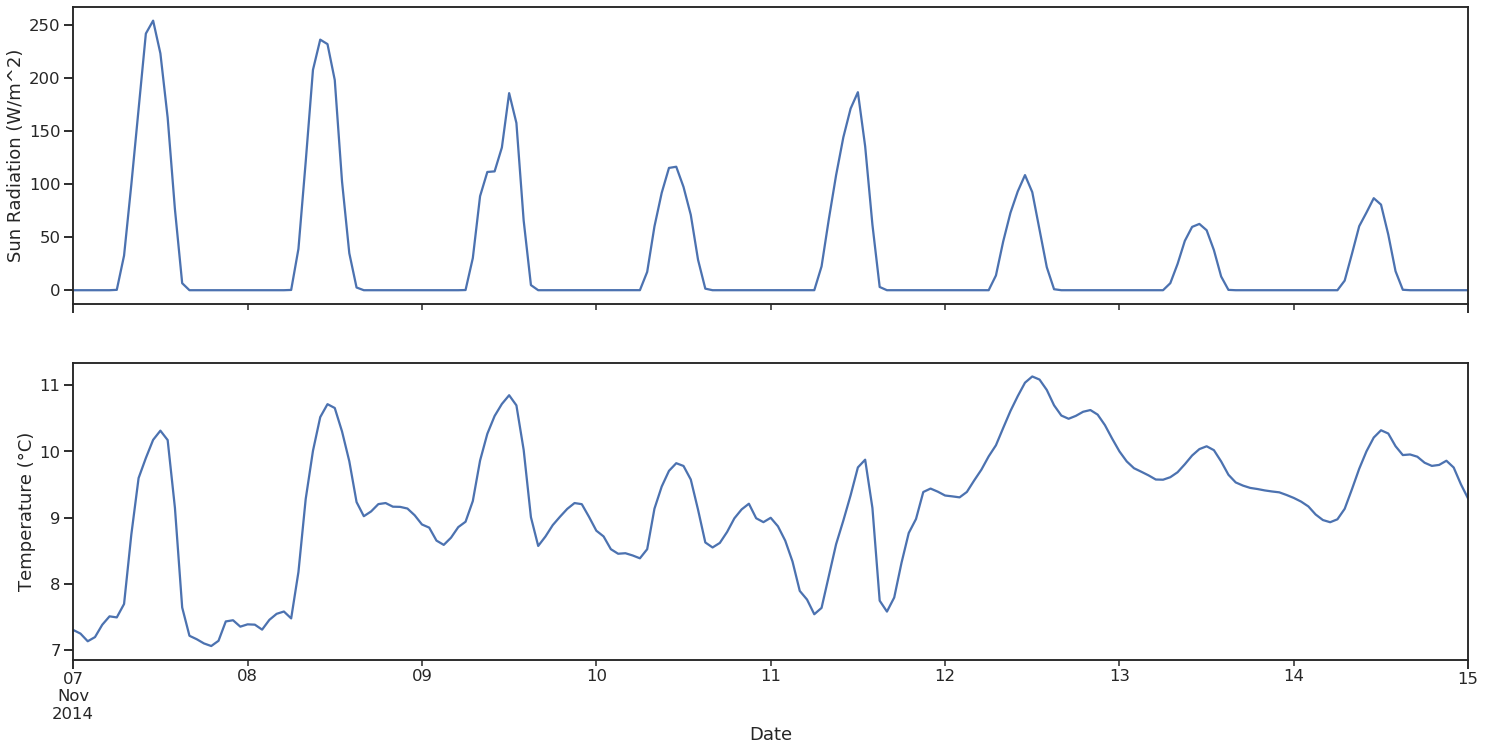

In [7]:
import matplotlib.dates as mdates
f, ax = plt.subplots(2,1,figsize=(25,12), sharex=True)

ax[0].set_ylabel('Sun Radiation (W/m^2)')
weather.loc[(weather['time'] <= end) & (weather['time'] >= start),'radiation_surface'].plot(ax=ax[0])

ax[1].set_ylabel('Temperature (°C)')
weather.loc[(weather['time'] <= end) & (weather['time'] >= start),'temperature'].plot(ax=ax[1])
#plt.xticks(dates)
#ax[1].xaxis.set_major_locator(mdates.DayLocator())
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax[1].set_xlabel('Date')
plt.savefig('data/output/nov_dec_weather.png',bbox_inches='tight')

In [15]:
start = pd.to_datetime('2014-11-01', infer_datetime_format=True)
end = pd.to_datetime('2014-12-31', infer_datetime_format=True)

weather.loc[(weather['time'] < end) & (weather['time'] >= start),'temperature'].describe()

count    1440.000000
mean        5.329065
std         3.597932
min        -6.557000
25%         3.207500
50%         5.209500
75%         8.015750
max        14.425000
Name: temperature, dtype: float64

In [16]:
start = pd.to_datetime('2014-01-01', infer_datetime_format=True)
end = pd.to_datetime('2014-01-31', infer_datetime_format=True)

weather.loc[(weather['time'] < end) & (weather['time'] >= start),'temperature'].describe()

count    720.000000
mean       1.202497
std        3.476593
min       -6.366000
25%       -1.613250
50%        1.135000
75%        4.364000
max        7.741000
Name: temperature, dtype: float64

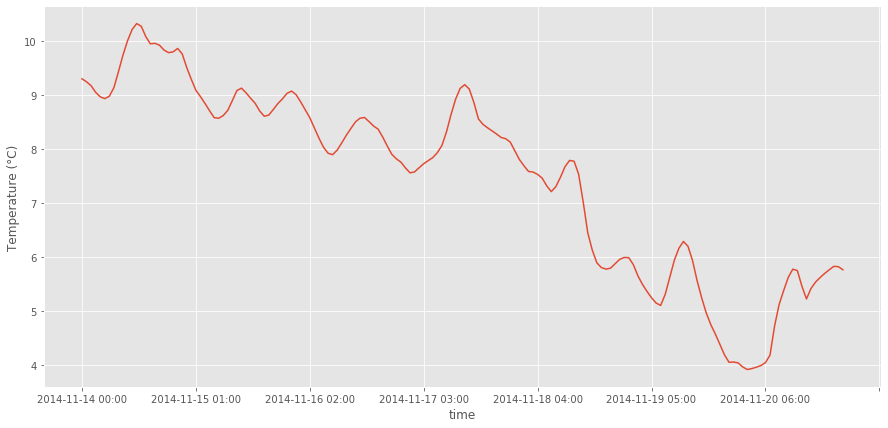

In [9]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature (°C)')
weather.loc[(weather['time'] < end) & (weather['time'] >= start),'temperature'].plot(ax=ax)

In [53]:
import random
random_day = random.randint(0,363)*24
weather.iloc[random_day:random_day+24,2][3]#.loc['temperature']

6.492000000000001

# Electricity prices

In [9]:
prices = pd.read_excel('data/environment/2014_spot_prices.xlsx')

In [10]:
prices['hour']=prices['Hours'].map(lambda x: x.split('-')[0].strip())

In [11]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT,string_date,hour
0,2014-01-01 00:00:00,00 - 01,"28,53","28,67","28,67","28,67","28,67","28,67","15,15","15,15",...,"29,07","29,07","28,67","28,67","28,67","28,67","32,06","32,06",01/01/2014,00
1,2014-01-01 00:00:00,01 - 02,"28,01","28,08","28,08","28,08","28,08","28,08","12,96","12,96",...,"28,81","28,81","28,08","28,08","28,08","28,08","32,02","32,02",01/01/2014,01
2,2014-01-01 00:00:00,02 - 03,"27,16","27,38","27,38","27,38","27,38","27,38","12,09","12,09",...,"28,42","28,42","27,38","27,38","27,38","27,38","27,38","27,38",01/01/2014,02
3,2014-01-01 00:00:00,03 - 04,"26,05","26,21","26,21","26,21","26,21","26,21","11,70","11,70",...,"27,63","27,63","26,21","26,21","26,21","26,21","26,21","26,21",01/01/2014,03
4,2014-01-01 00:00:00,04 - 05,"25,16","25,98","25,98","25,98","25,98","25,98","11,66","11,66",...,"25,98","25,98","25,98","25,98","25,98","25,98","25,98","25,98",01/01/2014,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,"29,54","29,49","29,49","29,49","29,49","30,93","29,49","29,49",...,"29,49","29,49","29,49","29,49","29,49","30,93","46,05","46,05",31-12-2014,19
8757,31-12-2014,20 - 21,"29,10","29,09","29,09","29,09","29,09","29,09","29,09","29,09",...,"29,09","29,09","29,09","29,09","29,09","29,09","45,78","45,78",31-12-2014,20
8758,31-12-2014,21 - 22,"28,83","28,82","28,82","28,82","28,82","28,82","28,82","28,82",...,"28,82","28,82","28,82","28,82","28,82","28,82","45,58","45,58",31-12-2014,21
8759,31-12-2014,22 - 23,"28,61","28,61","28,61","28,61","28,61","28,61","28,61","28,61",...,"28,61","28,61","28,61","28,61","28,61","28,61","29,06","29,06",31-12-2014,22


In [12]:
def extract_date(x,column):
    if column == 1:
        try: 
            return x.split('/')[1]
        except: 
            return x.split('-')[1]
    else:
        try: 
            x.split('/')[1]
            return x.split('/')[0]
        except: 
            return x.split('-')[0]
prices['year']='2014'
prices['month']=prices['string_date'].map(lambda x: extract_date(x,1))
prices['day']=prices['string_date'].map(lambda x: extract_date(x,0))

In [13]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Tr.heim,Tromsø,EE,LV,LT,string_date,hour,year,month,day
0,2014-01-01 00:00:00,00 - 01,"28,53","28,67","28,67","28,67","28,67","28,67","15,15","15,15",...,"28,67","28,67","28,67","32,06","32,06",01/01/2014,00,2014,01,01
1,2014-01-01 00:00:00,01 - 02,"28,01","28,08","28,08","28,08","28,08","28,08","12,96","12,96",...,"28,08","28,08","28,08","32,02","32,02",01/01/2014,01,2014,01,01
2,2014-01-01 00:00:00,02 - 03,"27,16","27,38","27,38","27,38","27,38","27,38","12,09","12,09",...,"27,38","27,38","27,38","27,38","27,38",01/01/2014,02,2014,01,01
3,2014-01-01 00:00:00,03 - 04,"26,05","26,21","26,21","26,21","26,21","26,21","11,70","11,70",...,"26,21","26,21","26,21","26,21","26,21",01/01/2014,03,2014,01,01
4,2014-01-01 00:00:00,04 - 05,"25,16","25,98","25,98","25,98","25,98","25,98","11,66","11,66",...,"25,98","25,98","25,98","25,98","25,98",01/01/2014,04,2014,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,"29,54","29,49","29,49","29,49","29,49","30,93","29,49","29,49",...,"29,49","29,49","30,93","46,05","46,05",31-12-2014,19,2014,12,31
8757,31-12-2014,20 - 21,"29,10","29,09","29,09","29,09","29,09","29,09","29,09","29,09",...,"29,09","29,09","29,09","45,78","45,78",31-12-2014,20,2014,12,31
8758,31-12-2014,21 - 22,"28,83","28,82","28,82","28,82","28,82","28,82","28,82","28,82",...,"28,82","28,82","28,82","45,58","45,58",31-12-2014,21,2014,12,31
8759,31-12-2014,22 - 23,"28,61","28,61","28,61","28,61","28,61","28,61","28,61","28,61",...,"28,61","28,61","28,61","29,06","29,06",31-12-2014,22,2014,12,31


In [14]:
prices['date']=pd.to_datetime(prices[['year','month','day','hour']])

In [15]:
prices['DK2']=prices['DK2'].map(lambda x: float(x.replace(',','.')) if type(x)==str else x)

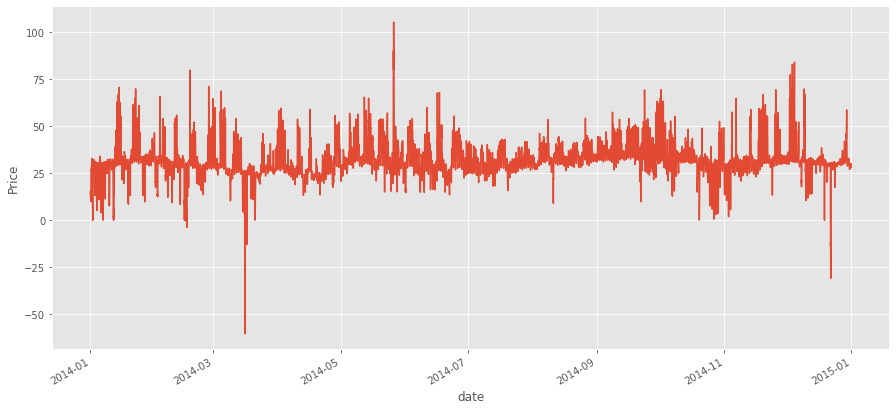

In [10]:
prices.index = prices.date
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Price')
prices.loc[:,'DK2'].plot(ax=ax)

In [27]:
jan_first_week = prices.loc[prices['date'] < pd.to_datetime('2014-01-08',infer_datetime_format=True)]

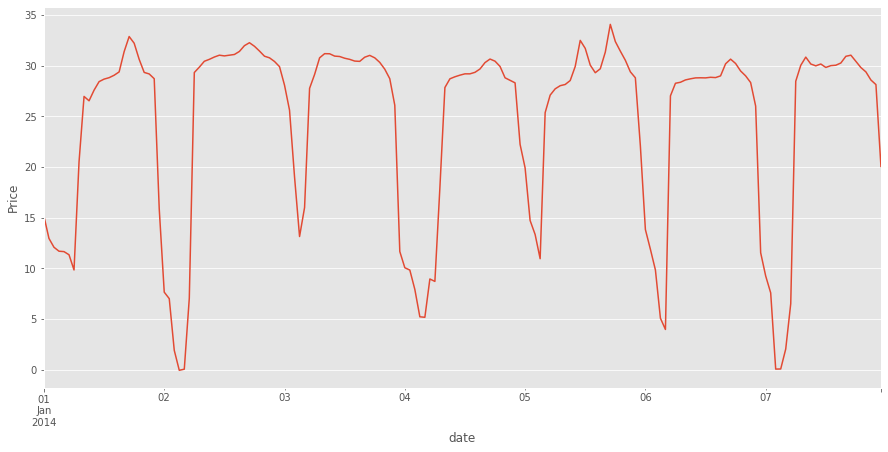

In [28]:
jan_first_week.index = jan_first_week.date
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Price (€/Mwh)')
jan_first_week.loc[:,'DK2'].plot(ax=ax)

In [16]:
import random
random_day=311*24#random.randint(304,365-7*24//24-1)*24
random_nov_dec = prices.iloc[random_day:random_day+7*24+1,:].loc[:,['DK2','date']]

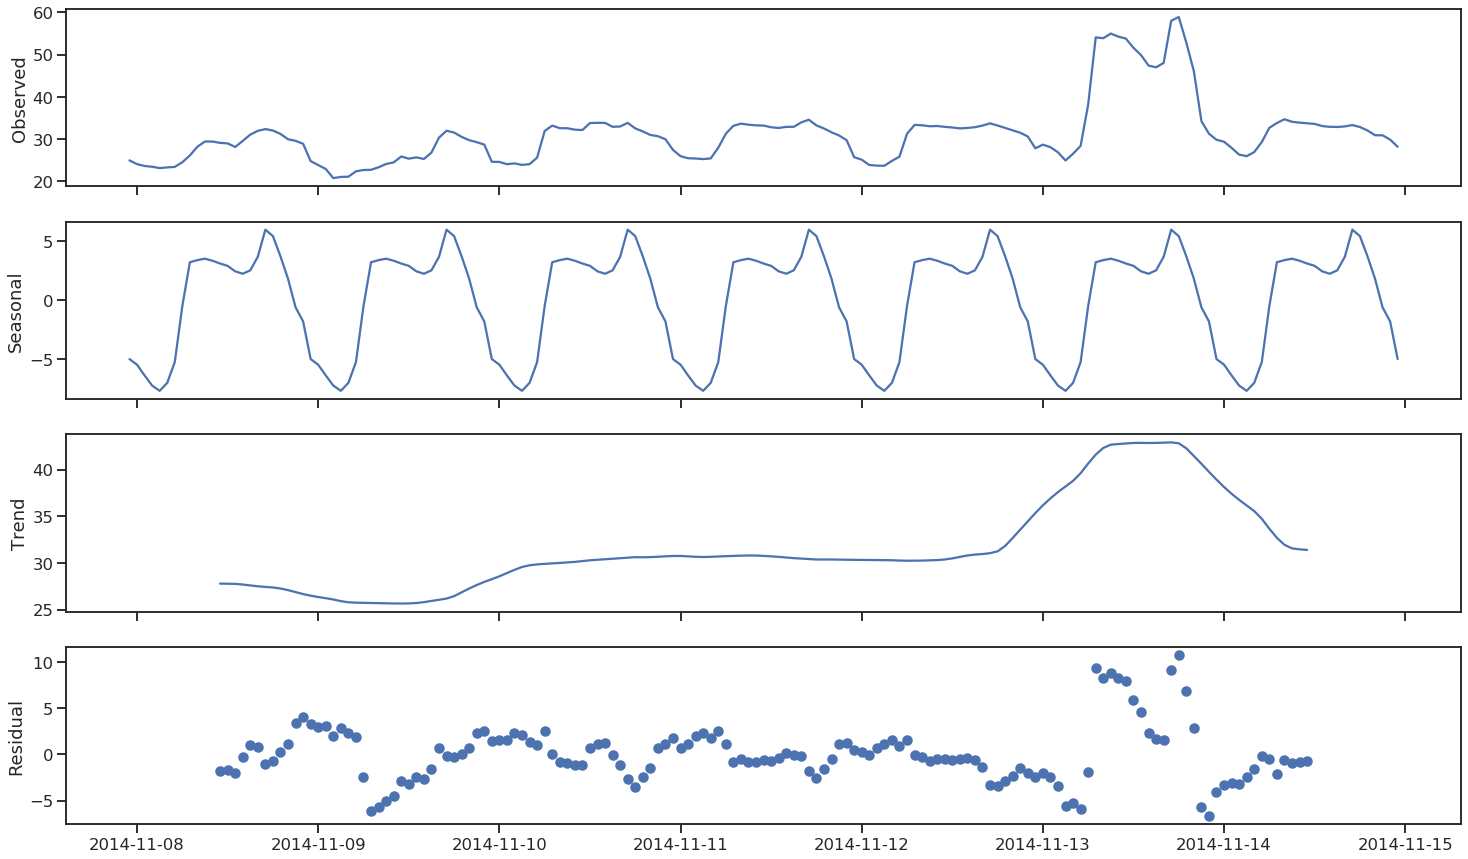

In [17]:
random_nov_dec.index = random_nov_dec.date
result = seasonal_decompose(random_nov_dec['DK2'], model='additive')

f, ax = plt.subplots(4,1,figsize=(25,15), sharex=True)
ax[0].plot(result.observed.index,result.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(result.observed.index,result.seasonal)
ax[1].set_ylabel('Seasonal')
ax[2].plot(result.observed.index,result.trend)
ax[2].set_ylabel('Trend')
ax[3].scatter(result.observed.index,result.resid)
#ax[3].xlim(result.observed.index[0], result.observed.index[-1])
ax[3].set_ylabel('Residual')
plt.savefig('data/output/nov_dec_price.png',bbox_inches='tight')

In [31]:
prices.iloc[304*24:,:].describe()

,DK2
count,1465.000000
mean,32.811119
std,10.474592
min,-30.850000
25%,29.670000
50%,31.240000
75%,33.290000
max,84.120000


In [32]:
prices.iloc[0:30*24,:].describe()

,DK2
count,720.000000
mean,30.918750
std,10.777951
min,-0.050000
25%,29.197500
50%,31.095000
75%,33.857500
max,70.680000


In [9]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Tromsø,EE,LV,LT,string_date,hour,year,month,day,date
0,2014-01-01 00:00:00,00 - 01,"28,53","28,67","28,67","28,67","28,67","28,67","15,15",15.15,...,"28,67","28,67","32,06","32,06",01/01/2014,00,2014,01,01,2014-01-01 00:00:00
1,2014-01-01 00:00:00,01 - 02,"28,01","28,08","28,08","28,08","28,08","28,08","12,96",12.96,...,"28,08","28,08","32,02","32,02",01/01/2014,01,2014,01,01,2014-01-01 01:00:00
2,2014-01-01 00:00:00,02 - 03,"27,16","27,38","27,38","27,38","27,38","27,38","12,09",12.09,...,"27,38","27,38","27,38","27,38",01/01/2014,02,2014,01,01,2014-01-01 02:00:00
3,2014-01-01 00:00:00,03 - 04,"26,05","26,21","26,21","26,21","26,21","26,21","11,70",11.70,...,"26,21","26,21","26,21","26,21",01/01/2014,03,2014,01,01,2014-01-01 03:00:00
4,2014-01-01 00:00:00,04 - 05,"25,16","25,98","25,98","25,98","25,98","25,98","11,66",11.66,...,"25,98","25,98","25,98","25,98",01/01/2014,04,2014,01,01,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,"29,54","29,49","29,49","29,49","29,49","30,93","29,49",29.49,...,"29,49","30,93","46,05","46,05",31-12-2014,19,2014,12,31,2014-12-31 19:00:00
8757,31-12-2014,20 - 21,"29,10","29,09","29,09","29,09","29,09","29,09","29,09",29.09,...,"29,09","29,09","45,78","45,78",31-12-2014,20,2014,12,31,2014-12-31 20:00:00
8758,31-12-2014,21 - 22,"28,83","28,82","28,82","28,82","28,82","28,82","28,82",28.82,...,"28,82","28,82","45,58","45,58",31-12-2014,21,2014,12,31,2014-12-31 21:00:00
8759,31-12-2014,22 - 23,"28,61","28,61","28,61","28,61","28,61","28,61","28,61",28.61,...,"28,61","28,61","29,06","29,06",31-12-2014,22,2014,12,31,2014-12-31 22:00:00


In [26]:
from statsmodels.distributions.empirical_distribution import ECDF
nov_dec = prices.iloc[304*24:]
nov_dec_cumulative = ECDF(nov_dec['DK2'])


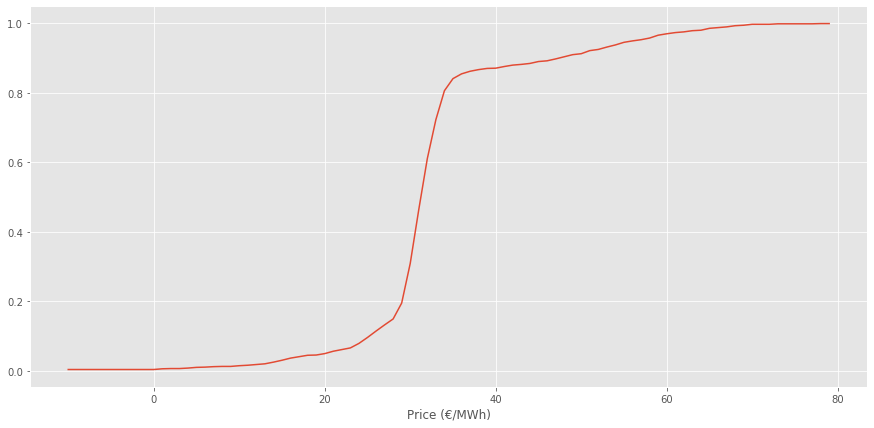

In [28]:
price_range = [p for p in range(-10,80)]


data = []

for p in price_range:
    data.append(nov_dec_cumulative(p))
    

f, ax = plt.subplots(figsize=(15,7))

plt.xlabel('Price (€/MWh)')
plt.plot(price_range, data)
#plt.savefig('data/output/nov_dec_price.png',bbox_inches='tight')

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF
jan = prices.iloc[:24*31]
jan_cumulative = ECDF(jan['DK2'])


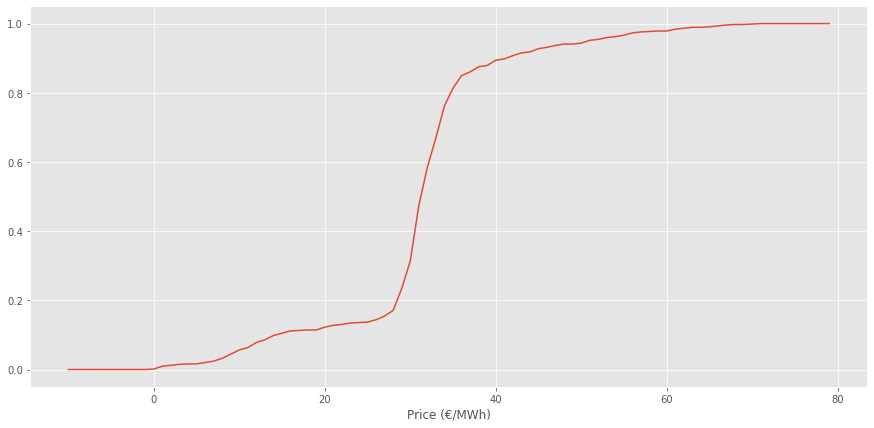

In [31]:
price_range = [p for p in range(-10,80)]


data = []

for p in price_range:
    data.append(jan_cumulative(p))
    

f, ax = plt.subplots(figsize=(15,7))

plt.xlabel('Price (€/MWh)')
plt.plot(price_range, data)
#plt.savefig('data/output/nov_dec_price.png',bbox_inches='tight')

In [19]:
jan.index = jan.date

result = seasonal_decompose(jan['DK2'], model='additive')


In [1]:
f, ax = plt.subplots(4,1,figsize=(25,15),sharex=True)
ax[0].plot(result.observed.index,result.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(result.observed.index,result.seasonal)
ax[1].set_ylabel('Seasonal')
ax[2].plot(result.observed.index,result.trend)
ax[2].set_ylabel('Trend')
ax[3].scatter(result.observed.index,result.resid)
#ax[3].xlim(result.observed.index[0], result.observed.index[-1])
ax[3].set_ylabel('Residual')
plt.savefig('data/output/jan_price.png',bbox_inches='tight')

NameError: name 'plt' is not defined

In [36]:
jan.index = prices.iloc[:24*31].date

In [24]:
prices['DK2'].to_csv('2014_DK2_spot_prices.csv')